# Data Introduction

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# Variables Information
### This dataframe contains 8 variables that correspond to:

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code                starts with letter 'c', it indicates a cancellation. 

**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 

**Description**: Product (item) name. Nominal. 

**Quantity**: The quantities of each product (item) per transaction. Numeric. 

**InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated. 

**UnitPrice**: Unit price. Numeric, Product price per unit in sterling. 

**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 

**Country**: Country name. Nominal, the name of the country where each customer resides.

## Load data

Import the data, specify data types



In [2]:
#datasource: http://archive.ics.uci.edu/ml/datasets/online+retail#
import pandas as pd
df = pd.read_excel('/Users/ej/Desktop/InferenceAnalytics/data/OnlineRetail.xlsx',converters={'CustomerID':str})
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")
df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


#### Create Date attribute in year-month-day format based on InvoiceDate

In [3]:
df['Date'] = df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m-%d'))    
df.Date = pd.to_datetime(df.Date)


In [4]:
df['Year_Month'] = df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))   
df.Year_Month = pd.to_datetime(df.Year_Month)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year_Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01


#### With no access to additional information about this data, it is hard to fill null values in the dataframe. I remove all the records which has null value

In [5]:
df = df.dropna(how='any')    #to drop if any value in the row has a nan


## Size of the dataset
There are 406829 rows and 9 variables in the dataset 

In [6]:
df.shape

(406829, 10)

## Order frequency distribution
#### The plot shows the distribution of order amount between 12/01/2010 and 12/09/2011
#### From the plot, we can see that most of the orders were placed around the end of year. Since we have Thanks giving and Christmas in the end of year, most of the wholesalers stock their product before holidays this could explain why most of orders were placed arounf the end of year.

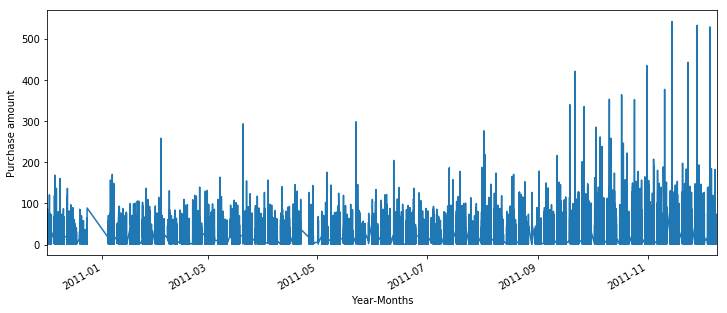

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

df['InvoiceDate'].value_counts().plot()
plt.xlabel('Year-Months')
plt.ylabel('Purchase amount')
plt.show()

## The total amount of order for different country

In [17]:
import numpy as np

# create country data
df_country = df.iloc[:,np.r_[0,7]]
df_country.head()
con = df_country.groupby(df_country['Country']).count()

#con = con.to_frame(name='Total purchase')

#con.sort_values(by='InvoiceNo', ascending = False)
con = con.rename(columns = {'InvoiceNo':'Total_Orders'})
con.reset_index(level=0, inplace=True)
con.sort_values(by='Total_Orders', ascending = False)


,Country,Total_Orders
35,United Kingdom,361878
14,Germany,9495
13,France,8491
10,EIRE,7485
30,Spain,2533
23,Netherlands,2371
3,Belgium,2069
32,Switzerland,1877
26,Portugal,1480
0,Australia,1259


# Create Choropleth Map for the order distribution

In [18]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [20]:
data = dict(type='choropleth',
locations = con['Country'],
locationmode = 'country names', z = con['Total_Orders'],
text = con['Country'], colorbar = {'title':'Total Orders'},
colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]], reversescale = True,
            marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ))

In [23]:
layout = dict(title='Order Distribution',
geo = dict(showframe=False,projection={'type':'Mercator'}))

### From the map, we can see that United Kingdom had the highest total amount of orders among all countries

In [24]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [25]:
df.apply(pd.Series.nunique)


InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
Date             305
Year_Month        13
dtype: int64